<a href="https://colab.research.google.com/github/laisab/AprendizadoDeMaquina/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apresentações / Taxonomia / Revisão (análise de dados e pré-processamento) / Generalização / viés e variância**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [8]:
warnings.filterwarnings('ignore')

## **Definição do problema**
Prever um valor ```y``` a partir de um valor ```x```, com dados ruidosos.

**Ruído nos dados**: informação não verdadeira, que pode ou não ser inconsistente, por causa de medições incorretas ou distorcidas, erro humano ou contaminação de amostras.

**Outliers**: valores anormais e não usuais, mesmo que corretos.

Primeiras 10 linhas do dataset:
          X         y
0  0.027611  0.071131
1  0.102922 -0.046763
2  0.127096  0.172634
3  0.171943 -0.822688
4  0.226136  0.114378
5  0.232252  0.408726
6  0.290418  1.025300
7  0.317792  0.053335
8  0.325258 -0.084694
9  0.370223  0.110945



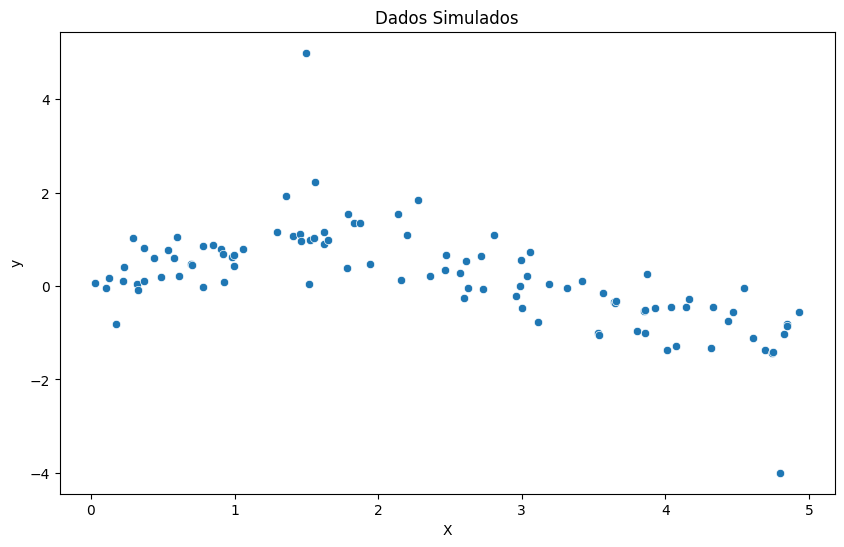

In [2]:
# Geração dos dados para simulação
np.random.seed(42)

# Criação de um array de números aleatórios com valores distribuídos uniformemente
X = np.sort(5 * np.random.rand(100, 1), axis=0) # Array 2D com 100 linhas (números aleatórios entre 0 e 1 multiplicados por 5 e ordenados) e 1 coluna
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0]) # Seno de X, "achata" o array e adiciona ruído gaussiano

# Adição de outliers para simulação de dados ruidosos
X_outliers = np.array([[1.5], [4.8]]) # Dois pontos de X
y_outliers = np.array([5.0, -4.0]) # Valores correspondentes aos outliers

X = np.vstack((X, X_outliers)) # Empilha verticalmente
y = np.hstack((y, y_outliers)) # Empilha horizontalmente

# Criação do DataFrame
df = pd.DataFrame({'X': X.ravel(), 'y': y.ravel()}) # ravel() transforma array 2D em 1D
print('Primeiras 10 linhas do dataset:')
print(df.head(10))
print()

# Visualização dos dados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=df) # Gráfico de dispersão
plt.title('Dados Simulados')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## **Pré-processamento dos dados**

Primeiras 10 linhas do dataset após tratamento de outliers:
          X         y
0  0.027611  0.071131
1  0.102922 -0.046763
2  0.127096  0.172634
3  0.171943 -0.822688
4  0.226136  0.114378
5  0.232252  0.408726
6  0.290418  1.025300
7  0.317792  0.053335
8  0.325258 -0.084694
9  0.370223  0.110945



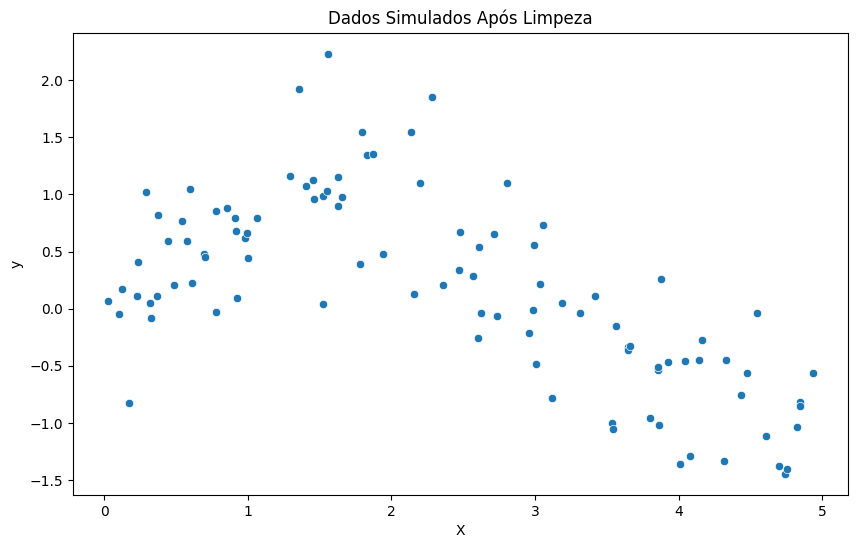

In [3]:
# Tratamento de outliers de maneira simples: limite de 3 desvios padrão da média
y_mean = df['y'].mean()
y_std = df['y'].std()
df_limpo = df[(df['y'] > y_mean - 3 * y_std) & (df['y'] < y_mean + 3 * y_std)].copy()
print('Primeiras 10 linhas do dataset após tratamento de outliers:')
print(df_limpo.head(10))
print()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=df_limpo)
plt.title('Dados Simulados Após Limpeza')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# Divisão dos dados
# 30% teste, 70% treino
X_train, X_test, y_train, y_test = train_test_split(df_limpo[['X']], df_limpo['y'], test_size=0.3, random_state=42)

print(f'Número de amostras de treino: {len(X_train)}')
print(f'Número de amostras de teste: {len(X_test)}')

Número de amostras de treino: 70
Número de amostras de teste: 30


## **Treinamento dos dados**

Algoritmos de regressão linear serão treinados com diferentes graus de complexidade polinomial.
*   Baixo grau polinomial: alto viés (underfitting).
*   Alto grau polinomial: baixo viés (overfitting).
*   Grau intermediário: bom equilíbrio.

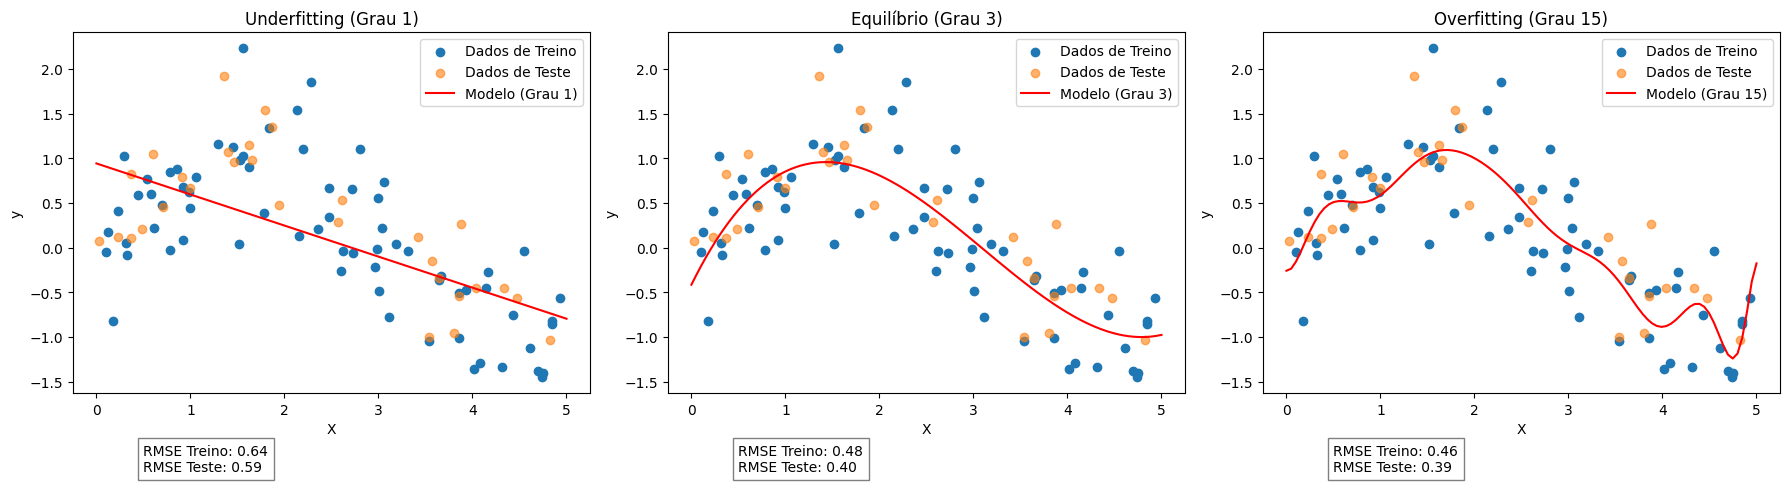

In [15]:
plt.figure(figsize=(18, 5))

# Desenho da linha do modelo de forma suave ao longo de X
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)

# ----- 1) Underfitting -----
ax1 = plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, label='Dados de Treino')
plt.scatter(X_test, y_test, label='Dados de Teste', alpha=0.6)
plt.title('Underfitting (Grau 1)')
plt.xlabel('X')
plt.ylabel('y')

# make_pipeline: sequência de transformações e um estimador.
# PolynomialFeatures(degree=1): transforma X em [1, X], pois X^0 = 1 e X^1 = X.
model_underfit = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
model_underfit.fit(X_train, y_train)
y_pred_underfit_train = model_underfit.predict(X_train) # Previsões nos dados de treino
y_pred_underfit_test = model_underfit.predict(X_test) # Previsões nos dados de teste
y_pred_underfit_plot = model_underfit.predict(X_plot) # Previsões nos pontos de plotagem

# Cálculo do Root Mean Squared Error (RMSE)
rmse_train_underfit = np.sqrt(mean_squared_error(y_train, y_pred_underfit_train))
rmse_test_underfit = np.sqrt(mean_squared_error(y_test, y_pred_underfit_test))

ax1.plot(X_plot, y_pred_underfit_plot, color='red', label='Modelo (Grau 1)')
plt.legend()
plt.text(0.5, -2.5, f'RMSE Treino: {rmse_train_underfit:.2f}\nRMSE Teste: {rmse_test_underfit:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# ----- 2) Equilíbrio -----
ax2 = plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, label='Dados de Treino')
plt.scatter(X_test, y_test, label='Dados de Teste', alpha=0.6)
plt.title('Equilíbrio (Grau 3)')
plt.xlabel('X')
plt.ylabel('y')

model_equilibrado = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_equilibrado.fit(X_train, y_train)
y_pred_equilibrado_train = model_equilibrado.predict(X_train)
y_pred_equilibrado_test = model_equilibrado.predict(X_test)
y_pred_equilibrado_plot = model_equilibrado.predict(X_plot)

rmse_train_equilibrado = np.sqrt(mean_squared_error(y_train, y_pred_equilibrado_train))
rmse_test_equilibrado = np.sqrt(mean_squared_error(y_test, y_pred_equilibrado_test))

ax2.plot(X_plot, y_pred_equilibrado_plot, color='red', label='Modelo (Grau 3)')
plt.legend()
plt.text(0.5, -2.5, f'RMSE Treino: {rmse_train_equilibrado:.2f}\nRMSE Teste: {rmse_test_equilibrado:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# ----- 3) Overfitting -----
ax3 = plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, label='Dados de Treino')
plt.scatter(X_test, y_test, label='Dados de Teste', alpha=0.6)
plt.title('Overfitting (Grau 15)')
plt.xlabel('X')
plt.ylabel('y')

model_overfit = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
model_overfit.fit(X_train, y_train)
y_pred_overfit_train = model_overfit.predict(X_train)
y_pred_overfit_test = model_overfit.predict(X_test)
y_pred_overfit_plot = model_overfit.predict(X_plot)

rmse_train_overfit = np.sqrt(mean_squared_error(y_train, y_pred_overfit_train))
rmse_test_overfit = np.sqrt(mean_squared_error(y_test, y_pred_overfit_test))

ax3.plot(X_plot, y_pred_overfit_plot, color='red', label='Modelo (Grau 15)')
plt.legend()
plt.text(0.5, -2.5, f'RMSE Treino: {rmse_train_overfit:.2f}\nRMSE Teste: {rmse_test_overfit:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

* Underfitting (grau 1)

A linha vermelha é muito simples, ou seja, o modelo não captura as nuances dos dados. O RMSE é alto para dados de treino e para os de teste, indicando **alto viés** e **baixa variância**. O modelo não é capaz de aprender uma relação e suas previsões são erradas.

* Equilíbrio (grau 3)

A curva vermelha se ajusta muito bem aos dados, sem sofrer influência do ruído. O RMSE de treino e o de teste são baixos e próximos, equilibrando viés e variância.

* Overfitting (grau 15)

A curva vermelha é muito ajustada aos dados de treino, inclusive o ruído. O RMSE de treino é baixo, pois o modelo "memorizou" os dados dessa partição, enquanto o RMSE de teste é maior, com a curva sendo mais "ondulada" fora da região dos dados de treino. Isso indica **baixo viés** e **alta variância**. O modelo é sensível a pequenas flutuações e ruídos e generaliza mal para dados novos.